<a href="https://colab.research.google.com/github/samarthGit2023/Image-Encryption/blob/main/AES_Encryption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pycryptodome

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 26.9 MB/s eta 0:00:00


In [6]:
from PIL import Image
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad
import os

def encrypt_image(input_path, output_path, key):
    # Load the image
    image = Image.open(input_path)

    # Convert the image to grayscale
    image = image.convert('L')

    # Get the image size
    width, height = image.size

    # Create a new grayscale image with the same size
    encrypted_image = Image.new('L', (width, height))

    # Create AES cipher object
    cipher = AES.new(key, AES.MODE_ECB)

    # Encrypt each image block
    for y in range(0, height, AES.block_size):
        for x in range(0, width, AES.block_size):
            # Get the block of pixels
            block = image.crop((x, y, x + AES.block_size, y + AES.block_size))

            # Convert the block to bytes
            block_bytes = block.tobytes()

            # Pad the block bytes
            padded_bytes = pad(block_bytes, AES.block_size)

            # Encrypt the block
            encrypted_bytes = cipher.encrypt(padded_bytes)

            # Create an image from the encrypted block bytes
            encrypted_block = Image.frombytes('L', (AES.block_size, AES.block_size), encrypted_bytes)

            # Paste the encrypted block into the new image
            encrypted_image.paste(encrypted_block, (x, y))

    # Save the encrypted image
    encrypted_image.save(output_path)

    print("Image encrypted and saved successfully!")

# Path to the input grayscale image
input_image_path = 'madara.jpg'

# Path to save the encrypted grayscale image
encrypted_image_path = 'encrypted_image_aes.jpg'

# Encryption key (16 bytes for AES-128)
key = b'extraterritorial'

# Encrypt the grayscale image using AES-ECB
encrypt_image(input_image_path, encrypted_image_path, key)


Image encrypted and saved successfully!




*   In this above code, we used AES(**Advanced Encryption Standard**) algorithm to encrypt the image.
*   In this algorithm, we import necessary modules for padding and AES encryption.In encrypt_image function, we take input as an image, convert it into grayscale image.
* We create a AES cipher object using the provided key and specify the mode as AES.MODE_ECB for Electronic CodeBook mode.
* We iterate over the image in block sized steps '**AES.block_size**' as the block size.After that we extract *block of pixels* from original image using **crop()** method. We convert the block of pixels into series of block bytes.
* After that, we pad the block bytes to match the AES block size using **pad()**. It adds padding bytes according to specified block size.
* **encrypted_bytes = cipher.encrypt(padded_bytes)**
* We perform the above operation on padded bytes. This encrypts the padded block bytes using the AES cipher object's **encrypt()** method.
* After this operation, we create new image block from the encrypted block bytes.
* **encrypted_image.paste(encrypted_block, (x, y))**
* We use the above operation to paste the encrypted block into the black canvas which will become our encryted image. We save the encrypted image.
* Original Image : 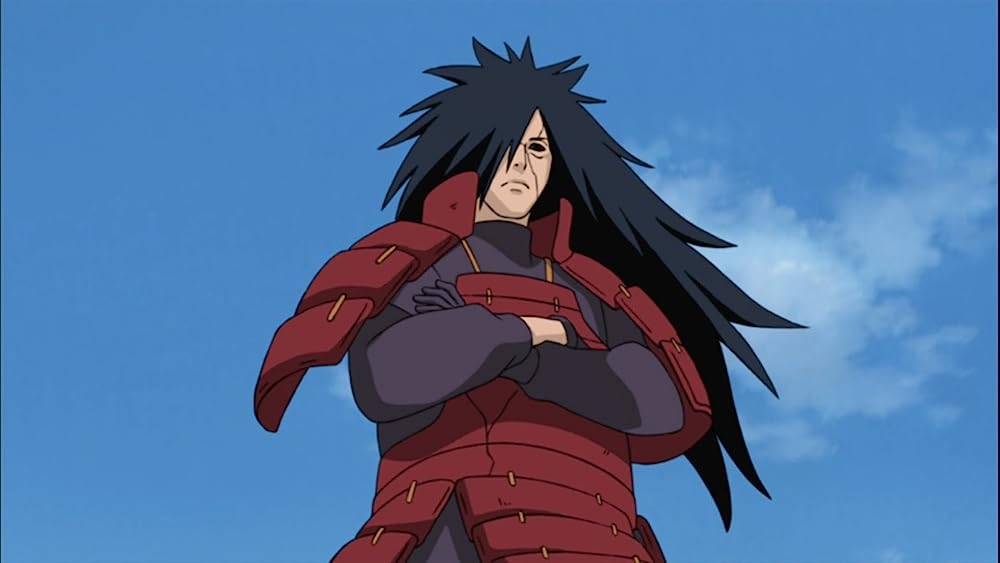

* AES Encrypted Image : 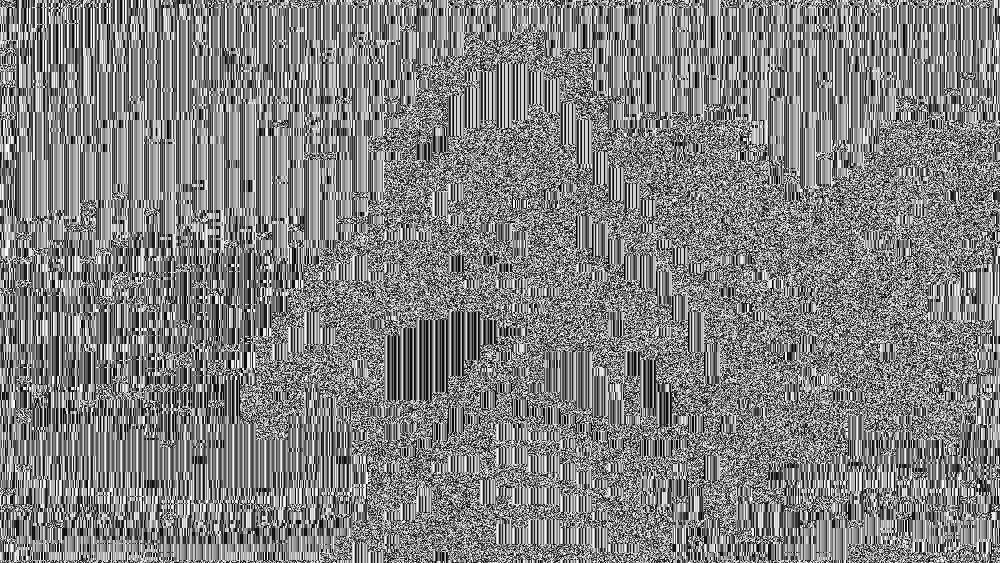

